# Summary
<ul style="list-style-type:none">
    <li>Introduction</li>
    <ul style="list-style-type:none">
        <li>I - Data study</li>
        <ul style="list-style-type:none;">
            <li>1. Loading the datas and first appreciation</li>
            <li>2. Missing datas</li>
            <ul style="list-style-type:none;">
                <li>Age</li>
                <li>Embarked and Fare</li>
            </ul>
            <li>3. Categorical to nominal</li>
        </ul>
        <li>II - Decision Tree Algorithm</li>
    </ul>
    <li>Conclusion</li>
</ul>

# Introduction

#### A quick word on Kaggle and the Titanic problem
<p>The Titanic problem is an introduction problem on the <a href="https://www.kaggle.com/c/titanic">Kaggle website</a>. It is one of the most attended competition on the website. It allows contestants to discover the way Kaggle competitions work with an easy problem. Over 10,000 users submitted a solution for this problem.</p>
    
This Kaggle problem will allow me to discover some interesting libraries for data analysis, such as pandas, seaborn, pyplot and scikit-learn. This libraries are usefull for data pre-processing, data vizualisation and data exploration in general. They are good tools to start with for any Machine Learning projects.

#### Problem description
This quotation is from the problem's web page:

"In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy."

## 1. First look at the datas

First I import the libraries necessary for data analysis.
<ul>
    <li><u>Pandas:</u> It is a very usefull library for machine learning. It provides very powerfull datastructures and data analysis tools for Python.</li>
    <li><u>Matplotlib & Seaborn:</u> I use these two libraries in combination so I can display interesting graphs to show correlations amoung the different features. Matplotlib and seaborn offer a great diversity of graphs and are very oftenly used in Python projects.</li>
</ul>
After importing the libraries, I used pandas to load the traininng (train_df) and test (test_df) datasets. df stands for dataframe which is the format used by the pandas library to manipulate datas. I then created two other variables combining the training and test datasets. I will use full_datas to quickly make modifications on both datasets at the same time during pre-processing. full_datas_df will be used for quick data visualisation as it still is a dataframe.

In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [477]:
train_df = pd.read_csv("datas/train.csv")
test_df = pd.read_csv("datas/test.csv")
full_datas = (train_df, test_df)
full_datas_df = pd.concat([train_df, test_df])

In [478]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [479]:
print("The shape of the train dataset is {}".format(train_df.shape))
print("The shape of the test datasset is {}".format(test_df.shape))

The shape of the train dataset is (891, 12)
The shape of the test datasset is (418, 11)


The train dataset contains 891 passengers, the test dataset contains 418 passengers. We have access to 11 features to predict weither the passenger is going to survive or not. The train dataset also contains the label of the data: "Survived". This feature can either be 0 for died or 1 for survived.

By looking at the Kaggle website, we get a description of each feature.

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<ul style="list-style-type:none;">
    <li>-<b>PassengerId</b> is just a number assigned to the passenger in the list of datas. Thus it is not an interesting feature to predict chances of survival and it must be <u>dropped</u>.</li>
    <li>-<b>Survived</b> is 0 when the passenger did not survived and 1 when it survived. It is the label of the datas.</li>
    <li>-<b>Pclass</b> is the class of the passenger it as 3 different values. It may affect the chances of survival of the passenger if it as a correlation with the ammount of money the passenger paid and if the money is a criteriad for survival.</li>
    <li>-<b>Name</b> is the full name of the passenger. I dedicated a full sub-part to this feature.</li>
    <li>-<b>Sex</b> is the sex of the passenger. It can either be male or female. I believe female had a higher chance of survival as the policy was: "Woman and children before".</li>
    <li>-<b>Age</b> is the age of the passenger. For the same reason as before, I believe it should play an important role in the survival chances.</li>
    <li>-<b>SibSp</b> is the number of sibling per spouse.</li>
    <li>-<b>Parch</b></li>
    <li>-<b>Ticket</b> is the ticket of the passenger. The format of this feature changes a lot from one passenger to another. I do not believe this feature is important to predict survival.</li>
    <li>-<b>Fare</b></li>
    <li>-<b>Cabin</b></li>
    <li>-<b>Embarked</b></li>
</ul>
These are just some insight on the feature importance. It needs to be verified with some investigation but it gives me some information on the way I should look at the datas. From this first analysis, I made the following ranking. The features are ranked according to the importance they should have in the chances of survival of the passenger. I did not include the features if I am not sure of there link with survival.
<ol>
    <li>Sex</li>
    <li>Age</li>
    <li>SibSp and Parch</li>
    <li>Fare</li>
</ol>
I decided to drop the PassengerId, because I am sure that including this feature will only reduce the performances of the classification algorithm. I also dropped the Ticket feature as the pre-processing for this feature seems too hard for the importance it has.

In [480]:
for dataset in full_datas:
    dataset.drop(["PassengerId", "Ticket"], axis=1, inplace=True)

## 2. Missing datas

Before we can apply any pre-processing to the datas, we need to complete the dataset. This quick script allow me to see the number of missing data there is for each feature.

In [481]:
total_nbr_datas = len(full_datas_df)
(total_nbr_datas - full_datas_df.count().sort_values())/total_nbr_datas * 100

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
Name            0.000000
Parch           0.000000
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Ticket          0.000000
dtype: float64

Here are the following decisions I took for the different features.
<ul>
    <li>I <u>drop</u> the <b>Cabin</b> feature as there are too many missing datas for this feature.</li>
    <li>I need to <u>complete</u> the <b>Age</b> feature because I believe it is an important feature for our model. I will first verify this assumption.</li>
    <li>I will <u>complete</u> the <b>Embarked</b> and <b>Fare</b> features, because there are only a few missing datas that will not affect the classification algorithm too much even if they are not well guessed.</li>
</ul>

### Cabin

In [482]:
for dataset in full_datas:
    dataset.drop(["Cabin"], axis=1, inplace=True)

### Age
Let's plot the number of passenger who survived and those who died according to their age.

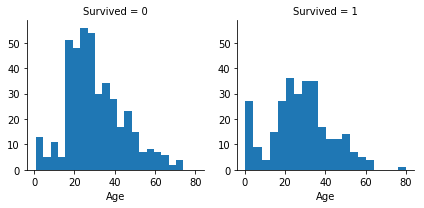

In [483]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

From this graph, we can really see that there is a dependancy between the age of the passenger and its chances of survival. Thus we need to find a way to complete the datas of this feature.

I used a random function to select ages wich are common ages for the dataset.

In [484]:
for dataset in full_datas:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\roland\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Embarked and Fare
There are only 2 missing datas for Embarked and 1 missing for Fare. I decided to use two different, but very simple technics to fill these missing datas. As it is a Numerical Continuous feature, I replaced the missing data of the fare by the median value for the train dataset. I replaced the two missing Embarked features with the top value for this feature.

In [485]:
for dataset in full_datas:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
    dataset["Embarked"] = dataset['Embarked'].fillna('S')

With a complete dataset to work with, I can now do some pre-processing.

## ?. Feature engineering

### Convert the name

We can extract interesting informations from the name of the passengers. I decided to extract the title of each person using a RegEx expression. Right after doing that, I made a couple of scripts to see the repartition of this feature.

In [486]:
for dataset in full_datas:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print("Percentage of the title in train dataset:")
print(test_df['Title'].value_counts()/test_df["Title"].count()*100)
print("\nPercentage of the title in test dataset:")
print(train_df['Title'].value_counts()/train_df["Title"].count()*100)

print("\nThis titles are present in train but not in test:")
print(set(train_df["Title"]) - set(test_df["Title"]))

Percentage of the title in train dataset:
Mr        57.416268
Miss      18.660287
Mrs       17.224880
Master     5.023923
Col        0.478469
Rev        0.478469
Dona       0.239234
Dr         0.239234
Ms         0.239234
Name: Title, dtype: float64

Percentage of the title in test dataset:
Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Major        0.224467
Col          0.224467
Mlle         0.224467
Sir          0.112233
Mme          0.112233
Lady         0.112233
Capt         0.112233
Ms           0.112233
Don          0.112233
Countess     0.112233
Jonkheer     0.112233
Name: Title, dtype: float64

This titles are present in train but not in test:
{'Major', 'Sir', 'Lady', 'Countess', 'Mlle', 'Mme', 'Capt', 'Don', 'Jonkheer'}


The information to get from this analysis is that all titles are not interesting for survival prediction. Indeed we can see that some of the titles present in the train dataset are not in the test dataset. Thus they are not usefull for the prediction. We also need to get rid of the titles which represent less than 10% of the dataset. The sample corresponding to these titles are not big enought to be significant.

The simmilar titles are merged such as "Mlle" and "Miss". And all the titles that are not usefull are coombined into one single title: "Rare". Then we have no more information to extract from the name feature so I drop it.

In [487]:
for dataset in full_datas:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset.drop(["Name"], axis=1, inplace=True)

Here are the final titles and there presence in the dataset in percentage.

In [488]:
title_df = pd.concat([train_df, test_df])
title_df["Title"].value_counts()

Mr      757
Miss    264
Mrs     198
Rare     90
Name: Title, dtype: int64

### Family sizes

Let's build a new feature using both SibSp and Parch and create a number which represents the number of members in the families of each passenger.

In [489]:
for dataset in full_datas:
    dataset["Family_size"] = dataset["SibSp"] + dataset["Parch"] + 1
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size
0,3,male,34,0,0,7.8292,Q,Mr,1
1,3,female,47,1,0,7.0000,S,Mrs,2
2,2,male,62,0,0,9.6875,Q,Mr,1
3,3,male,27,0,0,8.6625,S,Mr,1
4,3,female,22,1,1,12.2875,S,Mrs,3


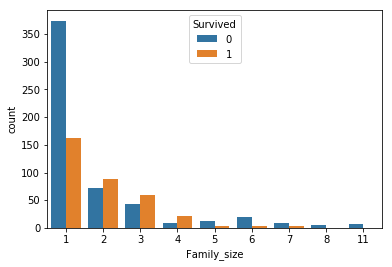

In [490]:
sns.countplot(x = "Family_size", hue = "Survived", data=train_df)
plt.show()

We can clearly see from the graph above that this feature as an impact on the chances of survival of the passengers. From this graph, I decided to create 3 bins of family sizes: 
<ul>
    <li>Family_size == 1</li>
    <li>Family_size > 1 && Family_size < 5</li>
    <li>Family_size > 4</li>
</ul>

In [491]:
for dataset in full_datas:
    dataset.loc[dataset['Family_size'] == 1, 'Family_size'] = 0
    dataset.loc[(dataset['Family_size'] > 1) & (dataset['Family_size'] < 5), 'Family_size'] = 1
    dataset.loc[dataset['Family_size'] > 4, 'Family_size'] = 2

In [492]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size
0,0,3,male,22,1,0,7.2500,S,Mr,1
1,1,1,female,38,1,0,71.2833,C,Mrs,1
2,1,3,female,26,0,0,7.9250,S,Miss,0
3,1,1,female,35,1,0,53.1000,S,Mrs,1
4,0,3,male,35,0,0,8.0500,S,Mr,0


### Object features
We need to convert the datas we now have to be able to feed them into a classification algorithm. Let's first take a look at the different types of data we have.

In [493]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
Family_size    418 non-null int64
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 27.8+ KB


In [494]:
for dataset in full_datas:
    dataset["Sex_code"] = dataset["Sex"].map({"male": 0, "female":1})
    dataset["Embarked_code"] = dataset["Embarked"].map({"C": 0, "Q": 1, "S": 2})
    dataset["Title_code"] = dataset["Title"].map({"Master": 0, "Miss": 1, "Mlle":2, "Mme": 3, "Mr": 4, "Mrs": 5, "Ms":6, "Rare": 7})

In [495]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Sex_code,Embarked_code,Title_code
0,0,3,male,22,1,0,7.2500,S,Mr,1,0,2,4
1,1,1,female,38,1,0,71.2833,C,Mrs,1,1,0,5
2,1,3,female,26,0,0,7.9250,S,Miss,0,1,2,1
3,1,1,female,35,1,0,53.1000,S,Mrs,1,1,2,5
4,0,3,male,35,0,0,8.0500,S,Mr,0,0,2,4


In [496]:
labels = train_df.Survived
features = train_df.drop(["Survived"], axis=1)

## ?. Data analysis

After following our intuision and logic about how to engineer the data, let's try to understand the data a little bit more using our libraries. First of all, pandas gives us a way to display the correlation between features, let's use that tool.

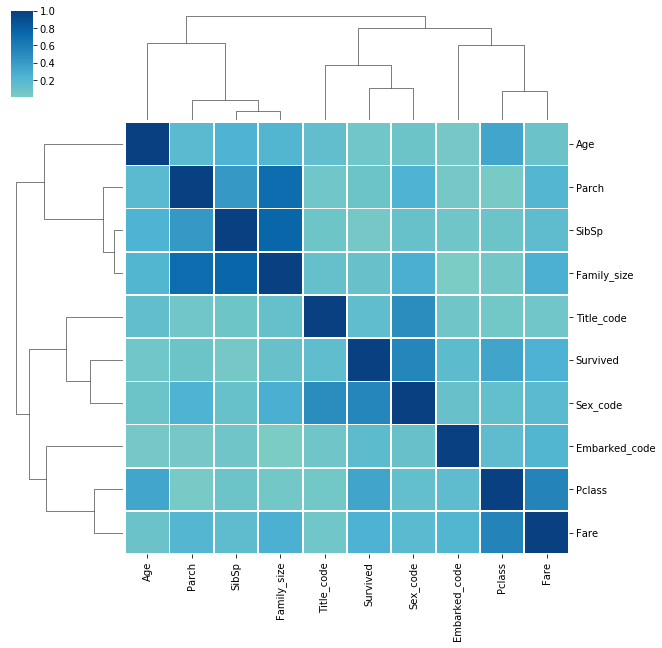

In [497]:
CorrelationMat=train_df.corr().abs()
cm=sns.clustermap(CorrelationMat, center=0, cmap="GnBu",
               linewidths=.75, figsize=(10, 10), metric="correlation")
plt.show()

In [498]:
display(CorrelationMat.loc["Survived"].sort_values(ascending=False))

Survived         1.000000
Sex_code         0.543351
Pclass           0.338481
Fare             0.257307
Embarked_code    0.167675
Title_code       0.150866
Family_size      0.108631
Parch            0.081629
Age              0.062397
SibSp            0.035322
Name: Survived, dtype: float64

Interestingly enough we can see that the sex of the passenger is indeed very correlated to survival. But right after that comes the passenger class and fare. The Age only comes at the penultimate rank. I expected the age of the passenger to have a greater impact on the chances of survival. Let's modify this feature a little bit to see if we can use it in a better way.

Also it is great to notice that the Title plays an important role and that the feature we created: Family_size has 10% of correlation with the Survived feature. The efforts invested in engineering these features paid.

### Age

I divided the ages into bins exactly like I did for the Family_size feature.

In [499]:
train_df["Age_band"] = pd.cut(train_df["Age"], 5)
train_df[["Age_band", "Survived"]].groupby("Age_band", as_index=False).mean().sort_values(by="Age_band", ascending=True)

,Age_band,Survived
0,"(-0.08, 16.0]",0.491379
1,"(16.0, 32.0]",0.362613
2,"(32.0, 48.0]",0.370518
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [500]:
for dataset in full_datas:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df = train_df.drop(['Age_band'], axis=1)

In [501]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Sex_code,Embarked_code,Title_code
0,0,3,male,1,1,0,7.2500,S,Mr,1,0,2,4
1,1,1,female,2,1,0,71.2833,C,Mrs,1,1,0,5
2,1,3,female,1,0,0,7.9250,S,Miss,0,1,2,1
3,1,1,female,2,1,0,53.1000,S,Mrs,1,1,2,5
4,0,3,male,2,0,0,8.0500,S,Mr,0,0,2,4


In [502]:
CorrelationMat=train_df.corr().abs()
CorrelationMat.loc["Survived"].sort_values(ascending=False)

Survived         1.000000
Sex_code         0.543351
Pclass           0.338481
Fare             0.257307
Embarked_code    0.167675
Title_code       0.150866
Family_size      0.108631
Parch            0.081629
Age              0.066695
SibSp            0.035322
Name: Survived, dtype: float64

The Age correlation with Survived only augmented of 1%. The conclusion is that the age of the passenger is not that much important to predict the chances of survival. But what about the other features.

### Other correlations

#### Sex

In [503]:
train_df[["Sex", "Survived"]].groupby("Sex", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female largely wins when it comes to chances of survival on the titanic.

C:\Users\roland\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\roland\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


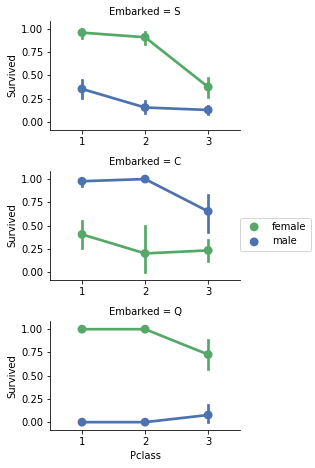

In [504]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

But we can see that it is not the case when it deals with passegers who embarked at C. For those one, men had greater chances of survival no matter what class they had.

#### Pclass

In [505]:
untouched_train_df[["Pclass", "Survived"]].groupby("Pclass", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The passenger class clearly shows that the more he paid for his ticket, the more chances he had to survive.

#### Fare

#### Title

In [506]:
train_df[["Title", "Survived"]].groupby("Title", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Title,Survived
2,Mrs,0.793651
0,Miss,0.702703
3,Rare,0.492063
1,Mr,0.156673


#### Embarked

In [507]:
train_df[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Parch

#### SibSp

# II - Decision Tree Algorithm

In [508]:
import graphviz
from sklearn import tree

In [509]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

ValueError: could not convert string to float: 'Mr'

In [ ]:
predicting = clf.predict(features)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features.columns.values,  
                         class_names=["Died", "Survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
graphviz.__file__

# Conclusion